In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.datasets import make_blobs, make_moons
from sklearn.metrics.pairwise import manhattan_distances, cosine_similarity
from scipy.spatial.distance import cdist
from sklearn.cluster import AgglomerativeClustering 
from scipy.spatial.distance import cosine
from sklearn.utils import resample

In [2]:
df=pd.read_csv(r"C:\Users\ohtha\Downloads\McDonalds Case Study-20241122T120505Z-001\McDonalds Case Study\mcdonalds.csv")

In [3]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
binary_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
df[binary_columns] = df[binary_columns].apply(lambda x: x.map({'Yes': 1, 'No': 0}))
print(df)

      yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
0         0           1      0          1       0     1      1      0   
1         1           1      0          1       1     1      1      1   
2         0           1      1          1       1     1      0      1   
3         1           1      0          1       1     1      1      1   
4         0           1      0          1       1     1      1      0   
...     ...         ...    ...        ...     ...   ...    ...    ...   
1448      0           1      0          1       1     0      0      0   
1449      1           1      0          1       0     0      1      1   
1450      1           1      0          1       0     1      0      1   
1451      1           1      0          0       0     1      1      1   
1452      0           1      0          1       1     0      0      0   

      expensive  healthy  disgusting          Like  Age      VisitFrequency  \
0             1        0           0        

In [5]:
print(df['Like'].unique())

['-3' '+2' '+1' '+4' 'I love it!+5' 'I hate it!-5' '-2' '+3' '0' '-4' '-1']


In [6]:
def extract_numeric(value):
    match = re.search(r'[-+]?\d+', str(value))
    return int(match.group()) if match else None
df['Like'] = df['Like'].apply(extract_numeric)
print(df['Like'].isna().sum())


0


In [7]:
print(df['Like'].head())

0   -3
1    2
2    1
3    4
4    2
Name: Like, dtype: int64


In [8]:
print(df.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [9]:
df.shape

(1453, 15)

In [10]:
df.replace({True: 1, False: 0}, inplace=True)


In [11]:
numerical_features = ['Like', 'Age']
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(df[numerical_features])


In [12]:
df[numerical_features] = scaled_numerical

print(df.head())

   yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
0      0           1      0          1       0     1      1      0          1   
1      1           1      0          1       1     1      1      1          1   
2      0           1      1          1       1     1      0      1          1   
3      1           1      0          1       1     1      1      1          0   
4      0           1      0          1       1     1      1      0          0   

   healthy  disgusting      Like       Age      VisitFrequency  Gender  
0        0           0 -1.212225  1.153258  Every three months  Female  
1        0           0  0.392515  0.449839  Every three months  Female  
2        1           0  0.071567  1.223600  Every three months  Female  
3        0           1  1.034411  1.715993         Once a week  Female  
4        1           0  0.392515  0.309156        Once a month    Male  


In [13]:
non_numeric_cols = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

Non-numeric columns: Index(['VisitFrequency', 'Gender'], dtype='object')


In [14]:
label_encoders = {}
for col in non_numeric_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [15]:
print(df.dtypes)

yummy               int64
convenient          int64
spicy               int64
fattening           int64
greasy              int64
fast                int64
cheap               int64
tasty               int64
expensive           int64
healthy             int64
disgusting          int64
Like              float64
Age               float64
VisitFrequency      int32
Gender              int32
dtype: object


Descriptive Statistics of the Data

In [16]:
print(df.describe())

             yummy   convenient        spicy    fattening       greasy  \
count  1453.000000  1453.000000  1453.000000  1453.000000  1453.000000   
mean      0.552650     0.907777     0.093599     0.867171     0.526497   
std       0.497391     0.289440     0.291371     0.339506     0.499469   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     1.000000     0.000000     1.000000     0.000000   
50%       1.000000     1.000000     0.000000     1.000000     1.000000   
75%       1.000000     1.000000     0.000000     1.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

              fast        cheap        tasty    expensive      healthy  \
count  1453.000000  1453.000000  1453.000000  1453.000000  1453.000000   
mean      0.900206     0.598761     0.644184     0.357880     0.198899   
std       0.299828     0.490318     0.478925     0.479542     0.399309   
min       0.000000     0.000000     0

In [17]:
columns_to_encode = ['VisitFrequency', 'Gender']
existing_columns = [col for col in columns_to_encode if col in df.columns]

if existing_columns:
    df = pd.get_dummies(df, columns=existing_columns, drop_first=True)
else:
    print(f"No columns to encode from {columns_to_encode}")


In [18]:
encoded_columns = [col for col in df.columns if 'VisitFrequency' in col or 'Gender' in col]
print(encoded_columns)

['VisitFrequency_1', 'VisitFrequency_2', 'VisitFrequency_3', 'VisitFrequency_4', 'VisitFrequency_5', 'Gender_1']


In [19]:
visit_cols = [col for col in df.columns if 'VisitFrequency_' in col]
print(visit_cols)


['VisitFrequency_1', 'VisitFrequency_2', 'VisitFrequency_3', 'VisitFrequency_4', 'VisitFrequency_5']


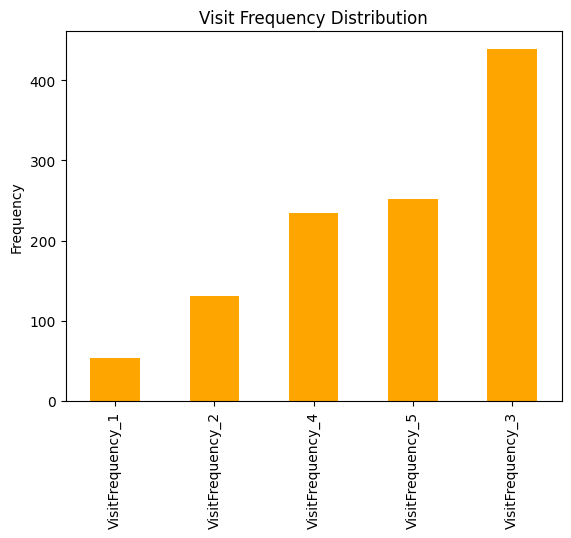

In [20]:
visit_cols = [col for col in df.columns if 'VisitFrequency_' in col]
df[visit_cols].sum().sort_values().plot(kind='bar', color='orange')
plt.title("Visit Frequency Distribution")
plt.ylabel('Frequency')
plt.show()

Correlation Between Numerical Variables

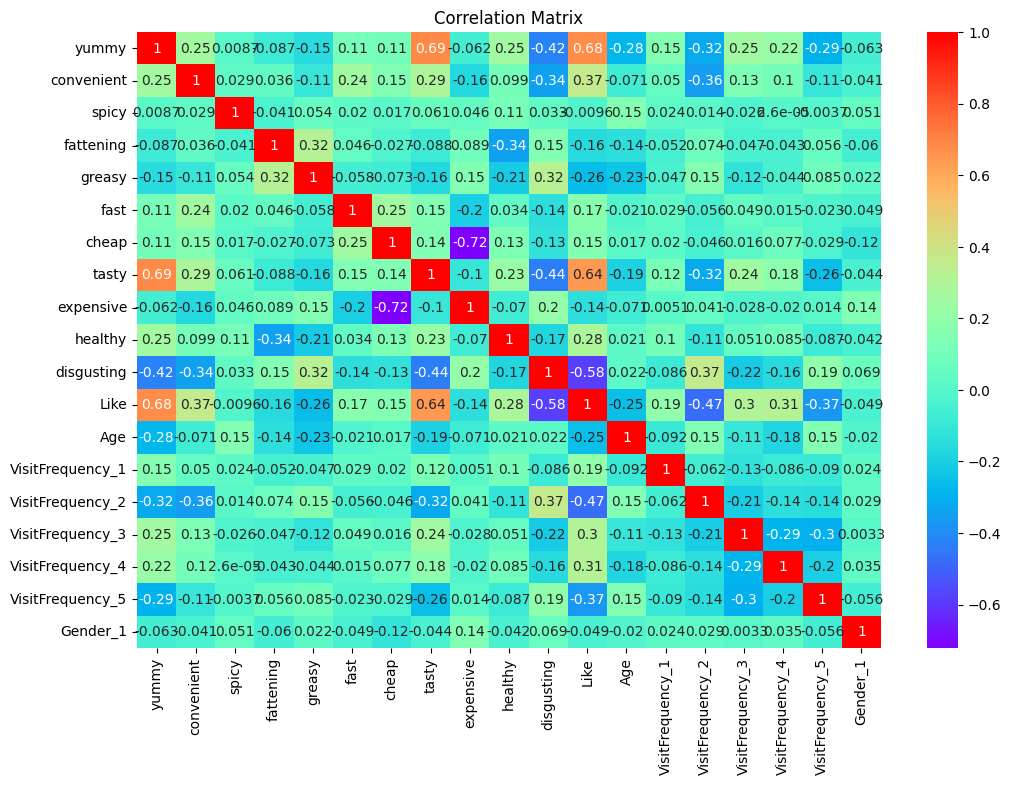

In [21]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="rainbow")
plt.title("Correlation Matrix")
plt.show()

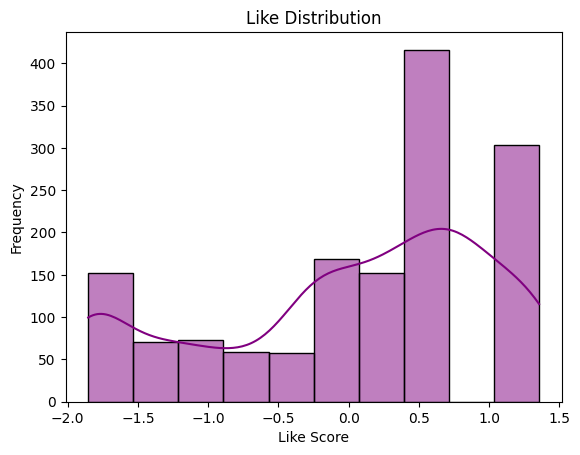

In [22]:
sns.histplot(df['Like'], kde=True, bins=10 ,color="purple")
plt.title("Like Distribution")
plt.xlabel("Like Score")
plt.ylabel("Frequency")
plt.show()

k-means

In [23]:
kmeans = KMeans(n_clusters=3, random_state=42) 
kmeans_labels = kmeans.fit_predict(df)
df['Cluster_KMeans'] = kmeans_labels
print(df.head())


C:\Users\ohtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
0      0           1      0          1       0     1      1      0          1   
1      1           1      0          1       1     1      1      1          1   
2      0           1      1          1       1     1      0      1          1   
3      1           1      0          1       1     1      1      1          0   
4      0           1      0          1       1     1      1      0          0   

   healthy  disgusting      Like       Age  VisitFrequency_1  \
0        0           0 -1.212225  1.153258             False   
1        0           0  0.392515  0.449839             False   
2        1           0  0.071567  1.223600             False   
3        0           1  1.034411  1.715993             False   
4        1           0  0.392515  0.309156             False   

   VisitFrequency_2  VisitFrequency_3  VisitFrequency_4  VisitFrequency_5  \
0             False             False             F

PCA (Principal Component Analysis)

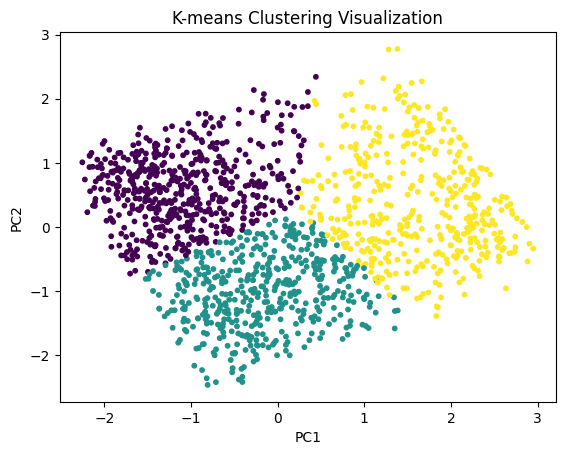

In [24]:
pca = PCA(n_components=2)
pca_df= pca.fit_transform(df.drop(columns=['Cluster_KMeans']))
plt.scatter(pca_df[:, 0], pca_df[:, 1], c=kmeans_labels, cmap='viridis', s=10)
plt.title('K-means Clustering Visualization')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [25]:
pca_df = pd.DataFrame(pca_df, columns=['PC1', 'PC2'])
print(pca_df.head())

        PC1       PC2
0  1.672996 -0.614261
1 -0.299967 -0.434230
2  0.565070 -0.954884
3 -0.172101 -1.672388
4 -0.038275 -0.373387


Single Linkage clustering

In [26]:
linkage_matrix = linkage(df, method='single')

In [27]:
hierarchical_labels = fcluster(linkage_matrix, 3, criterion='maxclust') 
df['Cluster_Hierarchical'] = hierarchical_labels

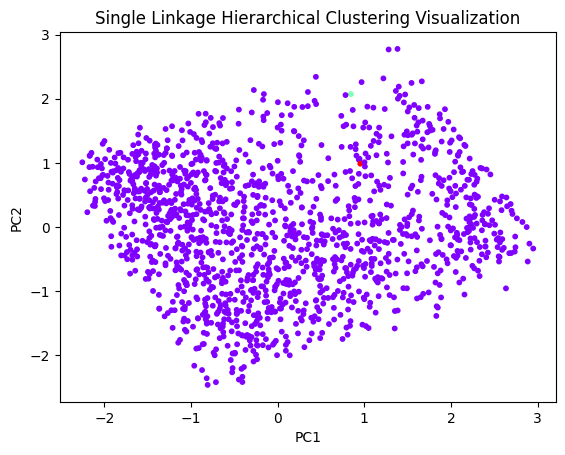

In [28]:
if len(hierarchical_labels) == len(pca_df):
    plt.scatter(pca_df['PC1'], pca_df['PC2'], c=hierarchical_labels, cmap='rainbow', s=10)
    plt.title('Single Linkage Hierarchical Clustering Visualization')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()
else:
    print("Mismatch between hierarchical_labels and PCA data rows!")


In [29]:
df = df.fillna(df.mean())

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.drop(columns=['Cluster_KMeans']))  

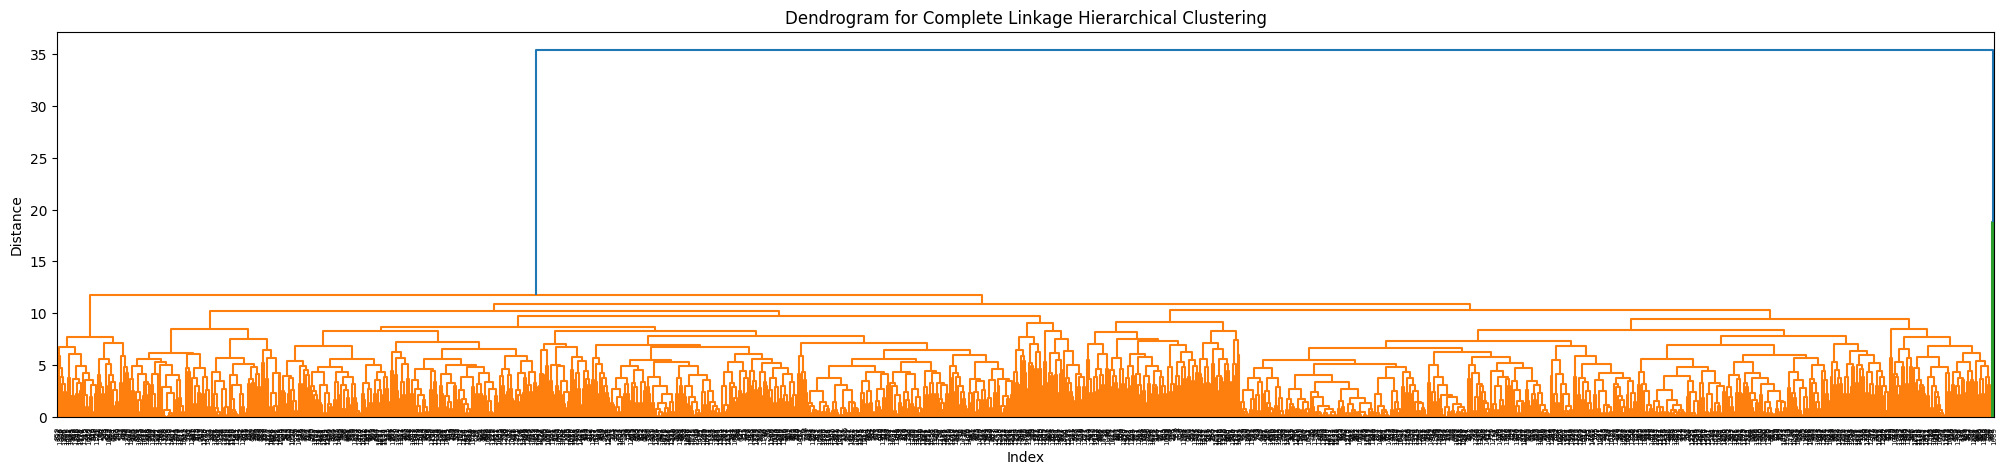

   yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
0      0           1      0          1       0     1      1      0          1   
1      1           1      0          1       1     1      1      1          1   
2      0           1      1          1       1     1      0      1          1   
3      1           1      0          1       1     1      1      1          0   
4      0           1      0          1       1     1      1      0          0   

   healthy  ...       Age  VisitFrequency_1  VisitFrequency_2  \
0        0  ...  1.153258             False             False   
1        0  ...  0.449839             False             False   
2        1  ...  1.223600             False             False   
3        0  ...  1.715993             False             False   
4        1  ...  0.309156             False             False   

   VisitFrequency_3  VisitFrequency_4  VisitFrequency_5  Gender_1  \
0             False             False             Fal

C:\Users\ohtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [30]:
linked = linkage(scaled_df, method='complete')

# Create a dendrogram
plt.figure(figsize=(25, 5))
dendrogram(linked)
plt.title('Dendrogram for Complete Linkage Hierarchical Clustering')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
df['Cluster_CompleteLinkage'] = hc.fit_predict(scaled_df)
print(df.head())

In [31]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
df['Cluster_CompleteLinkage'] = hc.fit_predict(scaled_df)
print(df.head())

C:\Users\ohtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


   yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
0      0           1      0          1       0     1      1      0          1   
1      1           1      0          1       1     1      1      1          1   
2      0           1      1          1       1     1      0      1          1   
3      1           1      0          1       1     1      1      1          0   
4      0           1      0          1       1     1      1      0          0   

   healthy  ...       Age  VisitFrequency_1  VisitFrequency_2  \
0        0  ...  1.153258             False             False   
1        0  ...  0.449839             False             False   
2        1  ...  1.223600             False             False   
3        0  ...  1.715993             False             False   
4        1  ...  0.309156             False             False   

   VisitFrequency_3  VisitFrequency_4  VisitFrequency_5  Gender_1  \
0             False             False             Fal

centriod clustering

C:\Users\ohtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ohtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ohtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ohtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\clus

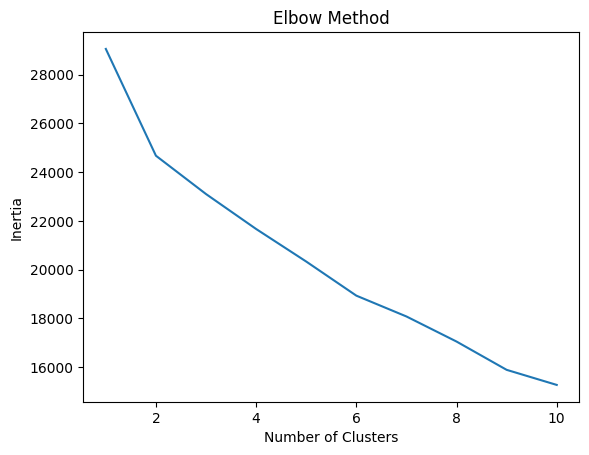

In [32]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [33]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster_Optimal'] = kmeans.fit_predict(df[['Age', 'Like']])


C:\Users\ohtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


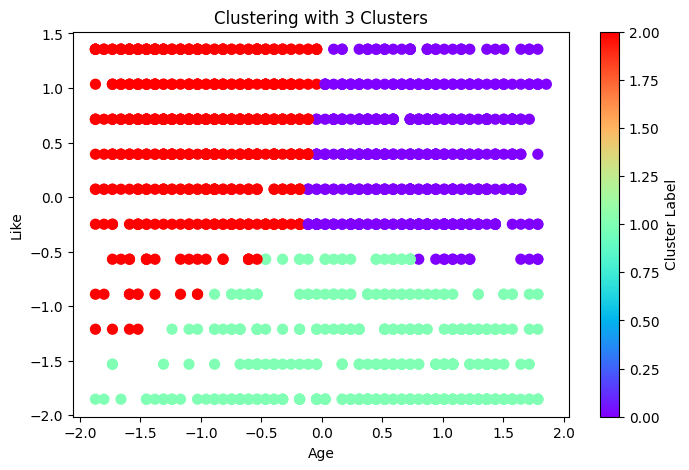

In [34]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Age'], df['Like'], c=df['Cluster_Optimal'], cmap='rainbow', s=50)
plt.title(f'Clustering with {optimal_clusters} Clusters')
plt.xlabel('Age')
plt.ylabel('Like')
plt.colorbar(label='Cluster Label')
plt.show()


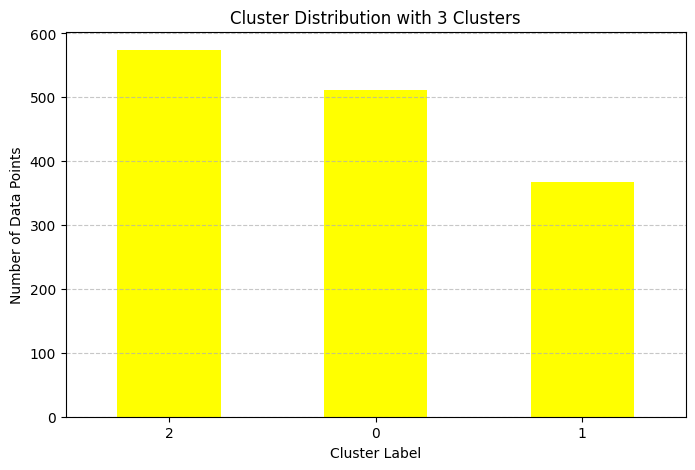

In [35]:
cluster_counts = df['Cluster_Optimal'].value_counts()

plt.figure(figsize=(8, 5))
cluster_counts.plot(kind='bar', color='yellow')
plt.title(f'Cluster Distribution with {optimal_clusters} Clusters')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Data Points')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [36]:
def apply_kmeans_with_distance_metric(data, distance_metric, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, algorithm='full')
    if distance_metric == 'manhattan':
       
        kmeans.fit(data)
        return kmeans
    elif distance_metric == 'angle':
       
        kmeans.fit(data)
        return kmeans
    else:
        
        kmeans.fit(data)
        return kmeans


distance method

In [37]:
kmeans_euclidean = apply_kmeans_with_distance_metric(scaled_df, 'euclidean')
df['Cluster_Euclidean'] = kmeans_euclidean.labels_


C:\Users\ohtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ohtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


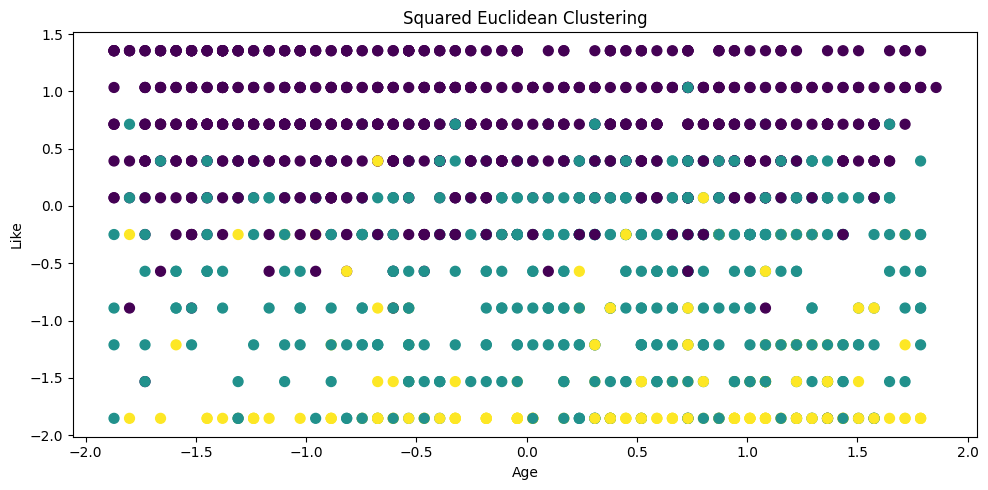

In [38]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df['Age'], df['Like'], c=df['Cluster_Euclidean'], cmap='viridis', s=50)
ax.set_title('Squared Euclidean Clustering')
ax.set_xlabel('Age')
ax.set_ylabel('Like')
plt.tight_layout()
plt.show()


In [39]:
kmeans_manhattan = apply_kmeans_with_distance_metric(scaled_df, 'manhattan')
df['Cluster_Manhattan'] = kmeans_manhattan.labels_


C:\Users\ohtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ohtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


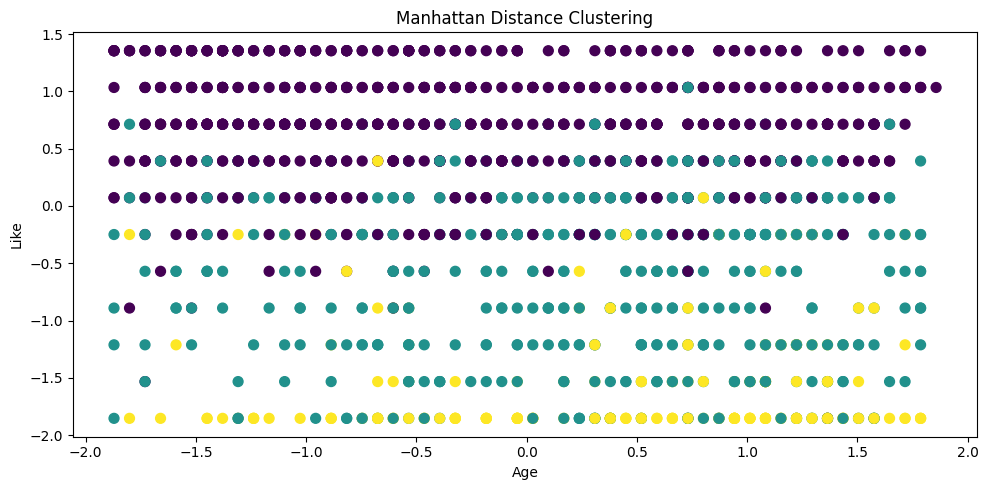

In [40]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df['Age'], df['Like'], c=df['Cluster_Manhattan'], cmap='viridis', s=50)
ax.set_title('Manhattan Distance Clustering')
ax.set_xlabel('Age')
ax.set_ylabel('Like')
plt.tight_layout()
plt.show()


In [41]:
cosine_distances = 1 - np.array([[cosine(i, j) for j in scaled_df] for i in scaled_df]) 
kmeans_angle = apply_kmeans_with_distance_metric(cosine_distances, 'angle')
df['Cluster_Angle'] = kmeans_angle.labels_

C:\Users\ohtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ohtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


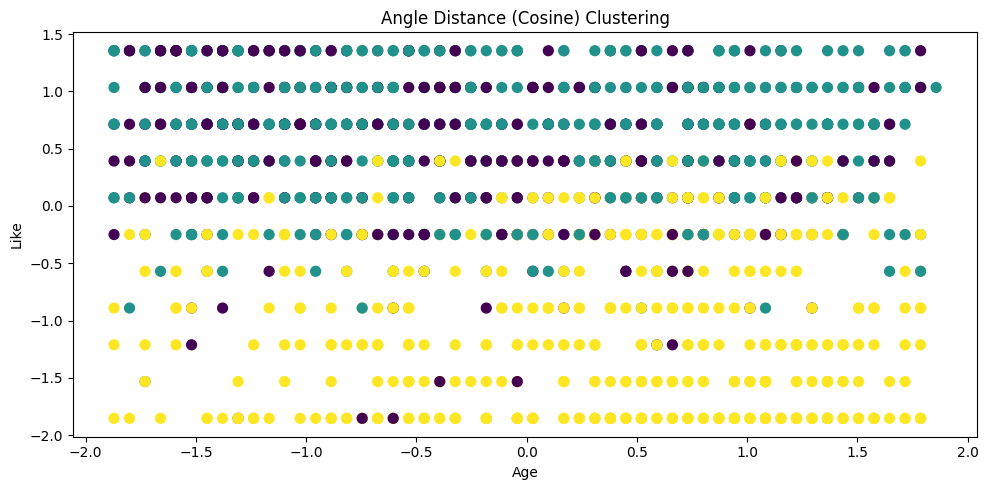

In [42]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df['Age'], df['Like'], c=df['Cluster_Angle'], cmap='viridis', s=50)
ax.set_title('Angle Distance (Cosine) Clustering')
ax.set_xlabel('Age')
ax.set_ylabel('Like')
plt.tight_layout()
plt.show()

 Bagging Clustering (Using KMeans)

In [43]:
def bagging_kmeans(df, n_clusters, n_estimators=10, random_state=42):
    labels_list = []
    for _ in range(n_estimators):
        bootstrap_sample = resample(df, random_state=random_state)
        labels_list.append(labels)
        final_labels = np.array([np.bincount([labels_list[i][j] for i in range(n_estimators)]).argmax() for j in range(df.shape[0])])
        return final_labels
        n_clusters = 3
        bagged_labels = bagging_kmeans(df[['Age', 'Like']], n_clusters)
        df['Cluster_Bagged'] = bagged_labels
        cluster_means = df.groupby('Cluster_Bagged').mean()



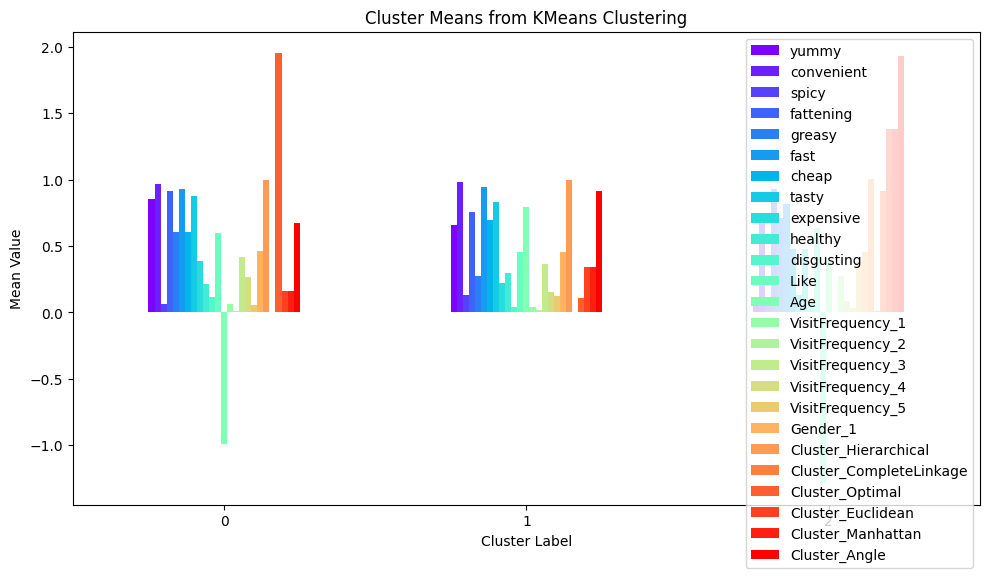

In [44]:
cluster_mean = df.groupby('Cluster_KMeans').mean()
cluster_mean.plot(kind='bar', figsize=(10, 6), colormap='rainbow')
plt.title('Cluster Means from KMeans Clustering')
plt.xlabel('Cluster Label')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()